Data Shape: (32581, 12)

Data Types:
 person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

First 5 Rows:
    person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  

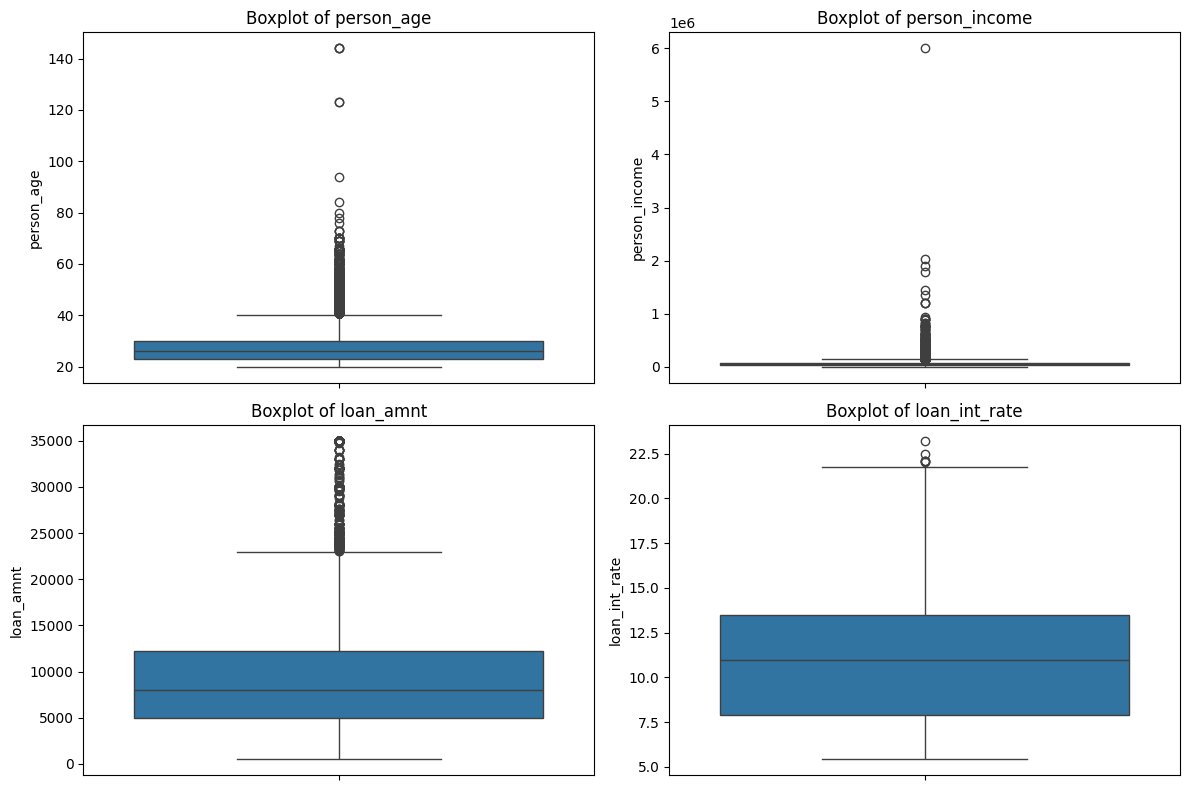

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('credit_risk_dataset.csv')


print("Data Shape:", df.shape)  # Rows and columns
print("\nData Types:\n", df.dtypes)  # Check data types (e.g., numeric vs. string)
print("\nFirst 5 Rows:\n", df.head())  # Preview data
print("\nMissing Values:\n", df.isnull().sum())  # Count missing values per column
print("\nSummary Statistics:\n", df.describe())  # Mean, min, max, quartiles for numeric columns


plt.figure(figsize=(12, 8))
for i, col in enumerate(['person_age', 'person_income', 'loan_amnt', 'loan_int_rate'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.savefig('initial_boxplots.png')
plt.show()

In [2]:
# Impute missing values
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)  # Median: 4.0
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)  # Mean: ~11.01

# Verify
print("Missing Values After Imputation:\n", df.isnull().sum())

Missing Values After Imputation:
 person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


C:\Users\sweta\AppData\Local\Temp\ipykernel_9152\2623429290.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)  # Median: 4.0
C:\Users\sweta\AppData\Local\Temp\ipykernel_9152\2623429290.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

In [3]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound, Q1, Q3, IQR

# Check for key columns
columns_to_check = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'person_emp_length']
for col in columns_to_check:
    outliers, lower, upper, Q1, Q3, IQR = detect_outliers_iqr(df, col)
    print(f"\n{col} Outlier Detection:")
    print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"Lower Bound: {lower:.2f}, Upper Bound: {upper:.2f}")
    print(f"Outliers Count: {len(outliers)}")
    if len(outliers) > 0:
        print(f"Sample Outliers: {outliers[col].head(3).tolist()}")


person_age Outlier Detection:
Q1: 23.00, Q3: 30.00, IQR: 7.00
Lower Bound: 12.50, Upper Bound: 40.50
Outliers Count: 1494
Sample Outliers: [144, 144, 123]

person_income Outlier Detection:
Q1: 38500.00, Q3: 79200.00, IQR: 40700.00
Lower Bound: -22550.00, Upper Bound: 140250.00
Outliers Count: 1484
Sample Outliers: [500000, 162500, 306000]

loan_amnt Outlier Detection:
Q1: 5000.00, Q3: 12200.00, IQR: 7200.00
Lower Bound: -5800.00, Upper Bound: 23000.00
Outliers Count: 1689
Sample Outliers: [35000, 35000, 35000]

loan_int_rate Outlier Detection:
Q1: 8.49, Q3: 13.11, IQR: 4.62
Lower Bound: 1.56, Upper Bound: 20.04
Outliers Count: 70
Sample Outliers: [20.25, 20.16, 21.21]

person_emp_length Outlier Detection:
Q1: 2.00, Q3: 7.00, IQR: 5.00
Lower Bound: -5.50, Upper Bound: 14.50
Outliers Count: 853
Sample Outliers: [123.0, 123.0, 18.0]


C:\Users\sweta\AppData\Local\Temp\ipykernel_9152\1274801214.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
C:\Users\sweta\AppData\Local\Temp\ipykernel_9152\1274801214.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

Data Shape After Cleaning: (32409, 12)
Final Summary Stats:
          person_age  person_income  person_emp_length     loan_amnt  \
count  32409.000000   32409.000000       32409.000000  32409.000000   
mean      27.730754   62427.330649           4.681940   9410.925977   
std        6.210445   31800.814798           3.718689   5812.369949   
min       20.000000    4000.000000           0.000000    500.000000   
25%       23.000000   38500.000000           2.000000   5000.000000   
50%       26.000000   55000.000000           4.000000   8000.000000   
75%       30.000000   79200.000000           7.000000  12250.000000   
max       94.000000  140250.000000          14.500000  23000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   32409.000000  32409.000000         32409.000000   
mean       11.014751      0.218705             0.170248   
std         3.077311      0.413374             0.106785   
min         5.420000      0.000000             0.000000   
25% 

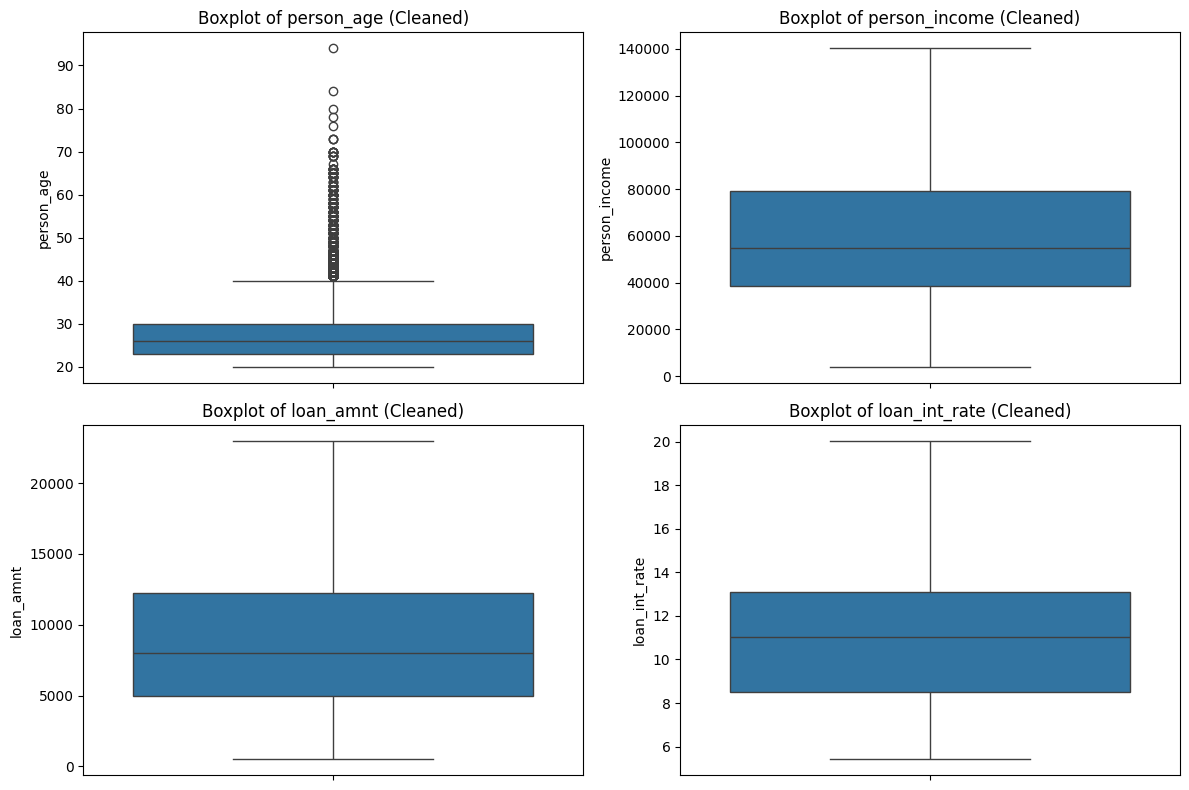

Cleaned data saved as 'final_cleaned_credit_risk.csv'.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('credit_risk_dataset.csv')


df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)


df = df[df['person_age'] <= 100]  # Remove ages >100 (e.g., 144)
df = df[df['person_emp_length'] <= 50]  # Remove employment >50 years (e.g., 123)


df['person_income'] = np.where(df['person_income'] > 140250, 140250, df['person_income'])


df['loan_amnt'] = np.where(df['loan_amnt'] > 23000, 23000, df['loan_amnt'])


df['loan_int_rate'] = np.where(df['loan_int_rate'] > 20.04, 20.04, df['loan_int_rate'])


df['person_emp_length'] = np.where(df['person_emp_length'] > 14.5, 14.5, df['person_emp_length'])


df = df.drop_duplicates()


print("Data Shape After Cleaning:", df.shape)
print("Final Summary Stats:\n", df.describe())


plt.figure(figsize=(12, 8))
for i, col in enumerate(['person_age', 'person_income', 'loan_amnt', 'loan_int_rate'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} (Cleaned)')
plt.tight_layout()

plt.show()


df.to_csv('final_cleaned_credit_risk.csv', index=False)
print("Cleaned data saved as 'final_cleaned_credit_risk.csv'.")

EDA Insights Using GroupBy:

Default Rate by Home Ownership:
  Home Ownership  Default Rate  Count
0       MORTGAGE     12.621577  13366
1          OTHER     31.132075    106
2            OWN      7.491221   2563
3           RENT     31.611091  16374

Stats by Loan Intent:
         Loan Intent  Avg Loan Amount  Default Rate    Avg Age
0  DEBTCONSOLIDATION      9423.448641     28.676045  27.613220
1          EDUCATION      9306.736620     17.256982  26.573100
2    HOMEIMPROVEMENT     10140.546745     26.154702  29.070117
3            MEDICAL      9093.143827     26.762661  28.006951
4           PERSONAL      9382.023290     19.887191  28.201237
5            VENTURE      9421.385807     14.861771  27.547808

Stats by Loan Grade:
  Loan Grade  Default Rate    Avg Income  Avg Loan Amount
0          A      9.960755  63594.063072      8430.802654
1          B     16.323190  62772.009534      9809.018683
2          C     20.758235  60272.431790      9091.333903
3          D     59.049461  600

C:\Users\sweta\AppData\Local\Temp\ipykernel_9152\179449647.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_default = df.groupby('age_group')['loan_status'].agg(['mean', 'count']).reset_index()
C:\Users\sweta\AppData\Local\Temp\ipykernel_9152\179449647.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=home_default, x='Home Ownership', y='Default Rate', palette='viridis')


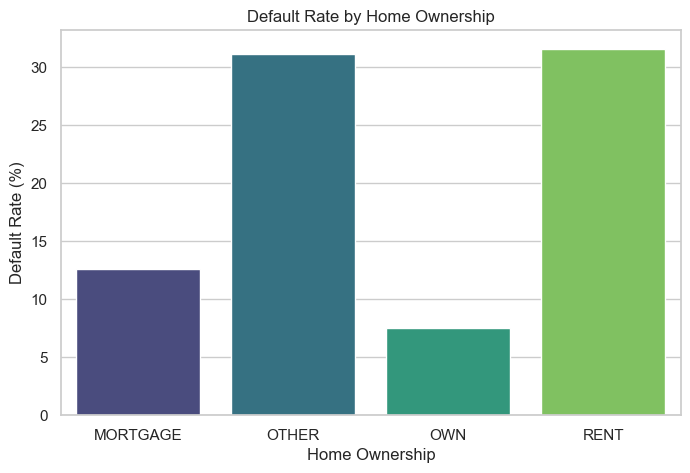

C:\Users\sweta\AppData\Local\Temp\ipykernel_9152\179449647.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=intent_stats, x='Loan Intent', y='Default Rate', palette='coolwarm')


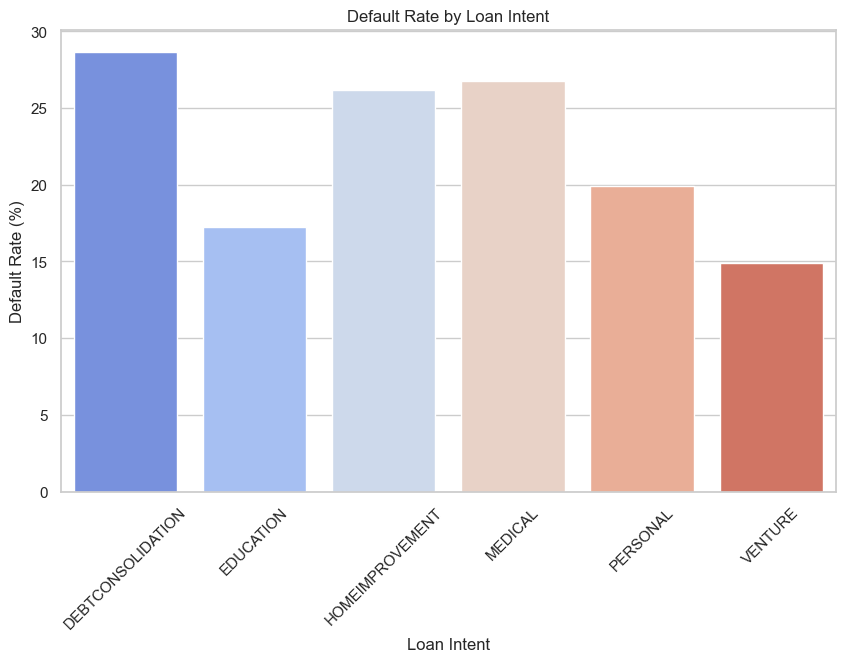

C:\Users\sweta\AppData\Local\Temp\ipykernel_9152\179449647.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grade_stats, x='Loan Grade', y='Default Rate', palette='plasma')


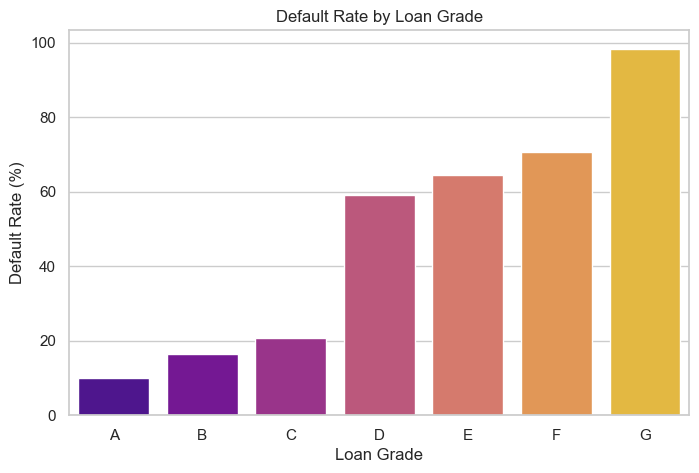

C:\Users\sweta\AppData\Local\Temp\ipykernel_9152\179449647.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_default, x='Age Group', y='Default Rate', palette='Blues')


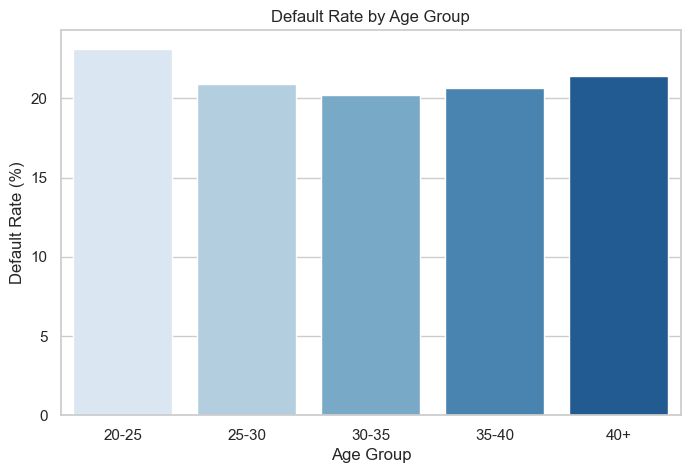

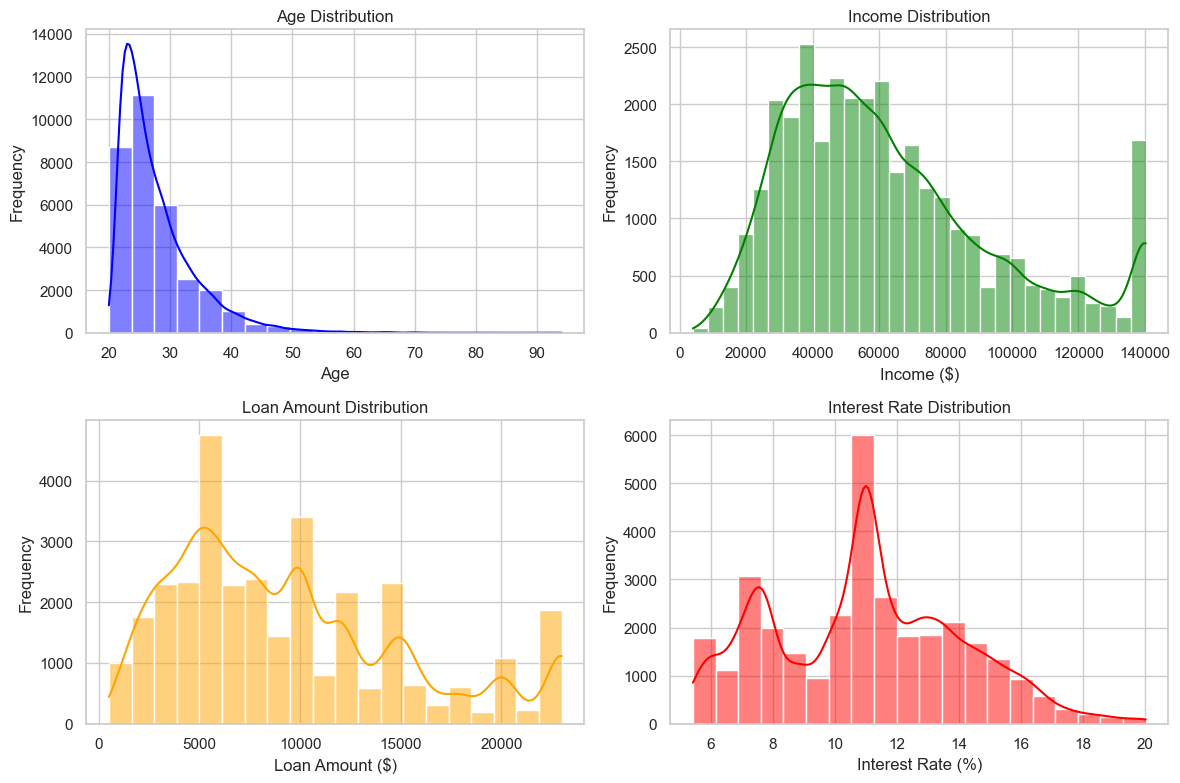

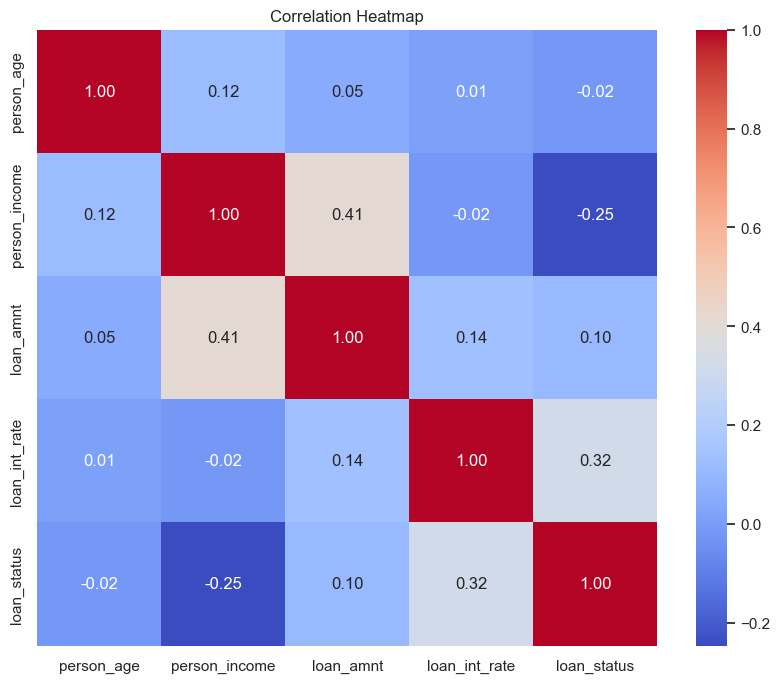

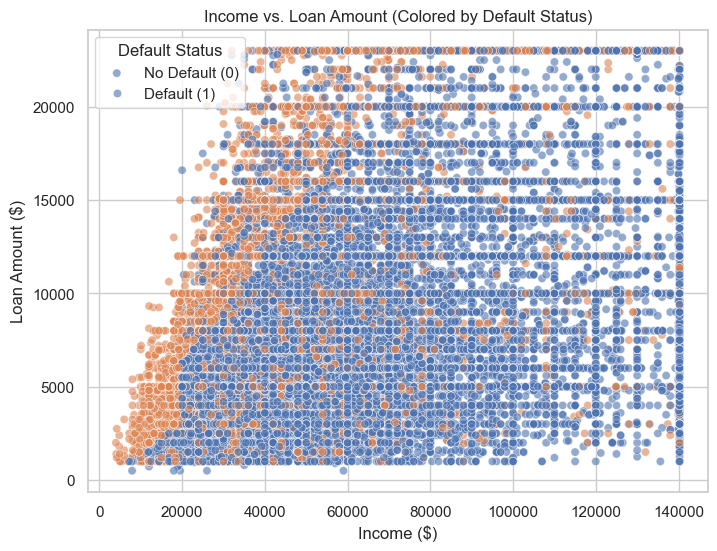

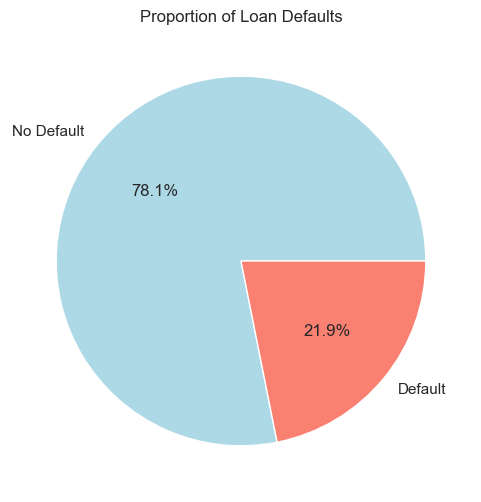


EDA Complete! GroupBy insights printed above. Graphs saved as PNG files. Ready for SQL or Power BI.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('final_cleaned_credit_risk.csv')


sns.set(style="whitegrid")


print("EDA Insights Using GroupBy:")

# 1. Default Rate by Home Ownership
home_default = df.groupby('person_home_ownership')['loan_status'].agg(['mean', 'count']).reset_index()
home_default.columns = ['Home Ownership', 'Default Rate', 'Count']
home_default['Default Rate'] *= 100  # Convert to %
print("\nDefault Rate by Home Ownership:")
print(home_default)

# 2. Average Loan Amount and Default Rate by Loan Intent
intent_stats = df.groupby('loan_intent').agg({
    'loan_amnt': 'mean',
    'loan_status': 'mean',
    'person_age': 'mean'
}).reset_index()
intent_stats.columns = ['Loan Intent', 'Avg Loan Amount', 'Default Rate', 'Avg Age']
intent_stats['Default Rate'] *= 100
print("\nStats by Loan Intent:")
print(intent_stats)

# 3. Default Rate and Average Income by Loan Grade
grade_stats = df.groupby('loan_grade').agg({
    'loan_status': 'mean',
    'person_income': 'mean',
    'loan_amnt': 'mean'
}).reset_index()
grade_stats.columns = ['Loan Grade', 'Default Rate', 'Avg Income', 'Avg Loan Amount']
grade_stats['Default Rate'] *= 100
print("\nStats by Loan Grade:")
print(grade_stats)

# 4. Age Groups and Default Rates
df['age_group'] = pd.cut(df['person_age'], bins=[20, 25, 30, 35, 40, 100], labels=['20-25', '25-30', '30-35', '35-40', '40+'])
age_default = df.groupby('age_group')['loan_status'].agg(['mean', 'count']).reset_index()
age_default.columns = ['Age Group', 'Default Rate', 'Count']
age_default['Default Rate'] *= 100
print("\nDefault Rate by Age Group:")
print(age_default)

# 5. Correlation Insights (using corr, not groupby, but complementary)
numeric_cols = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_status']
corr_matrix = df[numeric_cols].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)



# 1. Bar Chart: Default Rate by Home Ownership
plt.figure(figsize=(8, 5))
sns.barplot(data=home_default, x='Home Ownership', y='Default Rate', palette='viridis')
plt.title('Default Rate by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Default Rate (%)')
plt.savefig('default_by_home_ownership.png')
plt.show()

# 2. Bar Chart: Default Rate by Loan Intent
plt.figure(figsize=(10, 6))
sns.barplot(data=intent_stats, x='Loan Intent', y='Default Rate', palette='coolwarm')
plt.title('Default Rate by Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45)
plt.savefig('default_by_loan_intent.png')
plt.show()

# 3. Bar Chart: Default Rate by Loan Grade
plt.figure(figsize=(8, 5))
sns.barplot(data=grade_stats, x='Loan Grade', y='Default Rate', palette='plasma')
plt.title('Default Rate by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Default Rate (%)')
plt.savefig('default_by_loan_grade.png')
plt.show()

# 4. Bar Chart: Default Rate by Age Group
plt.figure(figsize=(8, 5))
sns.barplot(data=age_default, x='Age Group', y='Default Rate', palette='Blues')
plt.title('Default Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Default Rate (%)')
plt.savefig('default_by_age_group.png')
plt.show()

# 5. Histograms for Distributions
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['person_age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(df['person_income'], bins=30, kde=True, color='green')
plt.title('Income Distribution')
plt.xlabel('Income ($)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(df['loan_amnt'], bins=20, kde=True, color='orange')
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.histplot(df['loan_int_rate'], bins=20, kde=True, color='red')
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('distributions_histograms.png')
plt.show()

# 6. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

# 7. Scatter Plot: Income vs. Loan Amount (Colored by Default)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='person_income', y='loan_amnt', hue='loan_status', alpha=0.6)
plt.title('Income vs. Loan Amount (Colored by Default Status)')
plt.xlabel('Income ($)')
plt.ylabel('Loan Amount ($)')
plt.legend(title='Default Status', labels=['No Default (0)', 'Default (1)'])
plt.savefig('income_vs_loan_scatter.png')
plt.show()

# 8. Pie Chart: Proportion of Defaults
default_counts = df['loan_status'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(default_counts, labels=['No Default', 'Default'], autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Proportion of Loan Defaults')
plt.savefig('default_pie_chart.png')
plt.show()

print("\nEDA Complete! GroupBy insights printed above. Graphs saved as PNG files.")